# 1. Dot Product

Write a function `matrix_multiply(A, B)` using for loops, `+` and `*` that takes in two matrices (can be list of lists, or 2d numpy array) and returns their dot product (matrix multiplication). It should work with column vectors ($k \times 1$ dimensions) and row vectors ($1 \times k$) normally.


```import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

RETURNS: 
[[30, 36, 42],
 [66, 81, 96]]

---------example 2-------------
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

RETURNS:
[[30]]

```

Use `np.dot` to test your output

In [1]:
import numpy as np
import pandas as pd

In [2]:
class MatricesAreNotDefineable(Exception):
    pass
"""
We assume all matrices have at least 1 entry in each row and column

This follows the following corrolary:

For matrices A and B, where:
A is a matrix of dimensions m x nA
and B is a matrix of dimensions nB x k

AB are defined if nA = nB

And, should they be defined,

AB will be a matrix of dimensions m x k

"""
def are_defined(A,B):
    m = len(A)
    if m == 0: raise MatricesAreNotDefineable()
    nA = len(A[0])
    if nA == 0: raise MatricesAreNotDefineable()
    nB = len(B)
    if nB == 0: raise MatricesAreNotDefineable()
    if nA != nB: raise MatricesAreNotDefineable()
    k = len(B[0])
    return {
        'm': m,
        'nA': nA,
        'nB': nB,
        'k': k,
        'm x k': '{m} x {k}'.format(m=m,k=k)
    }

"""
Multiply two 1d vectors
"""
def mult_1d(a, b, at=0):
    if at >= len(a): return 0
    return (a[at] * b[at]) + mult_1d(a,b,at+1)

"""
Get a matrix's column in 1d vector form
with it's index
"""
def column_at(index, m):
    return [B[row][index] for row in range(len(m))]

def matrix_multiply(A, B):
    dim = are_defined(A, B)
    result = [[None] * dim['k'] for _ in range(dim['m'])] 
    for m in range(dim['m']):
        Ai = A[m]
        for k in range(dim['k']):
            result[m][k] = mult_1d(Ai, column_at(k, B))
    return result

    
A = [ [1,2,3], [4,5,6] ]

B = [ [1,2,3], [4,5,6], [7,8,9] ]

check = matrix_multiply(A,B)
checkNP = np.dot(A,B)
check == checkNP

array([[ True,  True,  True],
       [ True,  True,  True]])

# 2 Matrix Math torture

**2.1** Give a 3 examples of non-invertible square matrices that are non-zero

**2.2** Explain why the identity matrix $I$ is necessarily a square matrix with only $1$'s on the diagonal (hint: use the dot product from Q1)

**2.3** The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.

**2.4** Give an example of a nonzero $4 \times 4$ idempotent matrix (where $A \cdot A = A^2 = A$)

**2.5** solve the following system of equations for `x`, `y` and `z` using matrices and `numpy.linalg.solve`

$$x 	+ 	y 	+ 	z 	= 	6$$

$$2y 	+ 	5z 	= 	−4$$

$$2x 	+ 	5y 	− 	z 	= 	27$$

#### 2.1

First rule of a non-invertible square matrix is one whose determinant is equal to zero.

For 2x2 matrices, this would be any matrix with one row of zeros:

\begin{bmatrix}
0 & 0\\
a & b
\end{bmatrix}

or 
\begin{bmatrix}
a & b\\
0 & 0
\end{bmatrix}

For 3x3 matrices, since their determinants follow the following formulae for a given matrix A:

\begin{bmatrix}
a & b & c\\
d & e & f\\
g & h & i
\end{bmatrix}

\begin{equation}
\begin{vmatrix}
a & b & c\\
d & e & f\\
g & h & i
\end{vmatrix} = 
a 
\begin{vmatrix}
e & f\\
g & h
\end{vmatrix} +  
b
\begin{vmatrix}
d & f\\
g & i
\end{vmatrix} +  
c
\begin{vmatrix}
d & e\\
g & h
\end{vmatrix}
\end{equation}

This means that any 3x3 matrix that meets the following criteria will be non-invertible:

- its first row is all zeros
\begin{bmatrix}
0 & 0 & 0\\
d & e & f\\
g & h & i
\end{bmatrix}

- any matrix who has two columns with their 2nd and 3d entries as zeros

\begin{equation}
\begin{bmatrix}
a & b & c\\
0 & 0 & 0\\
0 & 0 & 0
\end{bmatrix}
 or 
\begin{bmatrix}
a & b & c\\
0 & e & 0\\
0 & h & 0
\end{bmatrix}
 or 
\begin{bmatrix}
a & b & c\\
0 & 0 & f\\
0 & 0 & i
\end{bmatrix}
 or 
\begin{bmatrix}
a & b & c\\
d & 0 & 0\\
g & 0 & 0
\end{bmatrix}
\end{equation}


- any matrix that combines the two points above


#### 2.2
An identity matrix I of dimension m x n satisfies the following rule for a matrix A of height n and any length k:


\begin{equation} I \cdot A = A \end{equation}

Given that a dot product, $I \cdot A$ in this case, is only possible if I has n columns
n  being the number of rows of A, and since A, given the equality above and the rule in Q1 outlining that the product of a dot product is always equal a matrix of height equal to I and of width equal to A's

Given that \begin{equation} I \cdot A = A \end{equation}

Which gives, in dimensional pseudo-expression: \begin{equation} (m n) \cdot (n k) = (m k) \end{equation}

Therefore: \begin{equation} (n k) = (m k) \end{equation}

so: \begin{equation} n = m \end{equation}

Further confirming that the Identity matrix must be a square matrix m x n where m = n.

This means that each entry of $I$, column index of the identity matrix in any of its rows, must produce the entry at that same row index in matrix A's column, while negating other entries in that column. Therefore, for an entry $x_{ij}$ in the identity matrix, i being its row index, and j its column index, which is also the index of the value to maintain in A: $x_{ij} = 1$ only if $i = j$.

The only entries in a matrix where its row and column indexes are the same, are the diagonal entries.

#### 2.3 The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.


Considering the cyclic permutations property of a matrix traces where for, say, 3 matrices:

$$trc(ABC) = trc(BCA) = trc(CAB)$$

And while considering that arbitrary permutations in multiplications are not allowed in trace operations:

$$trc(ABC) \neq trc(ACB)$$

We could surmize that for 3 square matrices of the same size $A B C$, and for 3 other matrices $\alpha = ABC$, $\beta = ACB$ and $\gamma = CBA$, the rule above would surmize that while $\alpha$, $\beta$ and $\gamma$ are all mulitplicable with one another (they are defineable as they are of the same size):

$$trc(\alpha) \neq trc(\beta)$$
$$trc(\alpha) \neq trc(\gamma)$$
$$trc(\beta) \neq trc(\gamma)$$

#### 2.4
Technically, the identity matrix $I_{4}$ is idempotent.

$$
I_{4}^2 =
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
\cdot\
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
$$
$$
=
\begin{bmatrix}
1x1 + 0x0 + 0x0 + 0x0 & 0x0 + 0x0 + 0x0 + 0x0 & 0x0 + 0x0 + 0x0 + 0x0 & 0x0 + 0x0 + 0x0 + 0x0\\
0x0 + 0x0 + 0x0 + 0x0 &  0x0 + 1x1 + 0x0 + 0x0 & 0x0 + 0x0 + 0x0 + 0x0 & 0x0 + 0x0 + 0x0 + 0x0\\
0x0 + 0x0 + 0x0 + 0x0 &  0x0 + 0x0 + 0x0 + 0x0 & 0x0 + 0x0 + 1x1 + 0x0 & 0x0 + 0x0 + 0x0 + 0x0\\
0x0 + 0x0 + 0x0 + 0x0 &  0x0 + 0x0 + 0x0 + 0x0 & 0x0 + 0x0 + 0x0 + 0x0 & 0x0 + 0x0 + 0x0 + 1x1 
\end{bmatrix}
$$

$$
=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix} 
$$

#### 2.5

$$x 	+ 	y 	+ 	z 	= 	6$$

$$2y 	+ 	5z 	= 	−4$$

$$2x 	+ 	5y 	− 	z 	= 	27$$

is also equal to the following equation:


\begin{equation}
\begin{bmatrix}
1 & 1 & 1\\
2 & 5 & 0\\
2 & 5 & -1
\end{bmatrix} = 
\begin{bmatrix}
6\\
-4\\
27
\end{bmatrix}
\end{equation}

In [3]:
m = np.array([[1,1,1], [2,5,0], [2,5,-1]])
n = np.array([[6], [-4], [27]])

solved = np.linalg.solve(m,n)
print("x is ", solved[0][0])
print("y is ", solved[1][0])
print("z is ", solved[2][0])

x is  63.0
y is  -26.0
z is  -31.0


# 3.1 Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [4]:
import operator
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

boston = load_boston()
bs = pd.DataFrame(boston.data, columns = boston.feature_names)
bs['MEDV'] = boston.target

In [5]:


cols = list(bs.columns)
cols.remove('MEDV')
Y = bs['MEDV']
X = bs[cols]
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
model.summary()
predictions

0      30.008213
1      25.029861
2      30.570232
3      28.608141
4      27.942882
         ...    
501    23.532617
502    22.378698
503    27.629342
504    26.129838
505    22.348703
Length: 506, dtype: float64

In [6]:
r2_lin = r2_score(Y, predictions)
print(r2_lin)

0.7406077428649428


# 3.2 Polynomial features

Use polynomial features to improve your regression model in `2.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

### Squared

In [7]:
# import sklearn
# print(sklearn.__version__)

import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

poly_reg_s = PolynomialFeatures(degree=2)

Xs = bs[cols]
X_poly_s = poly_reg_s.fit_transform(Xs)

pol_reg_s = LinearRegression()

model_s = sm.OLS(Y,X_poly_s).fit()
preds_s = model_s.predict(X_poly_s)
r2_s = r2_score(Y, preds_s)
print("R2 of squared regression of the features with house prices is {v}".format(v=r2_s))
model_s.summary()

R2 of squared regression of the features with house prices is 0.9291464466583603


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     51.18
Date:                Wed, 13 Jan 2021   Prob (F-statistic):          7.82e-180
Time:                        01:57:56   Log-Likelihood:                -1170.5
No. Observations:                 506   AIC:                             2549.
Df Residuals:                     402   BIC:                             2989.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -179.1844     85.103     -2.105      0.036    -346.487     -11.882
x1            -4.4922      6.882     -0.653      0.514     -18.022       9.038
x2             0.2076      0.480      0.432      0.666      -0.736       1.151
x3            -4.6868      1.896     -2.471      0.014      -8.415      -0.959
x4            29.7097     10.041      2.959      0.003       9.971      49.449
x5           142.3293    128.785      1.105      0.270    -110.848     395.506
x6            22.0178      7.895      2.789      0.006       6.497      37.538
x7             0.9022      0.289      3.123      0.002       0.334       1.470
x8            -7.2871      5.021     -1.451      0.147     -17.158       2.584
x9             1.9191      2.531      0.758      0.449      -3.057       6.895
x10            0.0209      0.142      0.148      0.883      -0.258       0.299
x11            6.5659      3.992      1.645      0.101      -1.282      14.413
x12            0.0923      0.074      1.240      0.216      -0.054       0.239
x13            0.7312      0.892      0.820      0.413      -1.023       2.485
x14            0.0018      0.001      1.510      0.132      -0.001       0.004
x15            0.2136      0.194      1.102      0.271      -0.168       0.595
x16            0.3944      0.468      0.843      0.400      -0.525       1.314
x17            2.5045      0.560      4.475      0.000       1.404       3.605
x18           -0.7921      0.903     -0.877      0.381      -2.567       0.983
x19            0.1294      0.058      2.222      0.027       0.015       0.244
x20           -0.0033      0.004     -0.875      0.382      -0.011       0.004
x21           -0.0942      0.107     -0.879      0.380      -0.305       0.116
x22            0.2132      0.620      0.344      0.731      -1.006       1.432
x23           -0.0240      0.046     -0.526      0.599      -0.114       0.066
x24            0.3855      0.331      1.166      0.244      -0.265       1.036
x25           -0.0003      0.000     -1.739      0.083      -0.001     4.1e-05
x26            0.0206      0.007      3.063      0.002       0.007       0.034
x27           -0.0005      0.001     -0.785      0.433      -0.002       0.001
x28           -0.0052      0.005     -1.022      0.308      -0.015       0.005
x29           -0.0627      0.064     -0.982      0.327      -0.188       0.063
x30           -1.0417      0.619     -1.683      0.093      -2.259       0.175
x31            0.0135      0.027      0.500      0.618      -0.040       0.067
x32          7.26e-05      0.001      0.083      0.934      -0.002       0.002
x33           -0.0104      0.010     -1.072      0.284      -0.029       0.009
x34           -0.0049      0.007     -0.700      0.484      -0.019       0.009
x35            0.0006      0.000      3.104      0.002       0.000       0.001
x3

# Cubic

In [8]:
# pol_reg_c = LinearRegression()
# pol_reg_c.fit(X_poly_c,Y)
# model_c = pol_reg_c.predict(X_poly_c)

poly_reg_c = PolynomialFeatures(degree=3)

Xc = bs[cols]
X_poly_c = poly_reg_c.fit_transform(Xc)


model_c = sm.OLS(Y,X_poly_c).fit()
preds_c = model_c.predict(X_poly_c)

r2_c = r2_score(Y, preds_c)
print("R2 of cubic regression of the features with house prices is {v}".format(v=r2_c))
model_c.summary()

R2 of cubic regression of the features with house prices is 0.9977994082505955


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     27.62
Date:                Wed, 13 Jan 2021   Prob (F-statistic):           2.32e-16
Time:                        01:58:02   Log-Likelihood:                -292.13
No. Observations:                 506   AIC:                             1538.
Df Residuals:                      29   BIC:                             3554.
Df Model:                         476                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6440.0746   7.88e+04      0.082      0.935   -1.55e+05    1.68e+05
x1          1.925e+04   3.05e+04      0.630      0.534   -4.32e+04    8.17e+04
x2         -1334.2998   1672.301     -0.798      0.431   -4754.540    2085.940
x3         -1.045e+04   4.17e+04     -0.251      0.804   -9.57e+04    7.48e+04
x4            15.6939     92.587      0.170      0.867    -173.669     205.057
x5          5413.6246   4.72e+04      0.115      0.910   -9.12e+04    1.02e+05
x6          2694.2963   7369.473      0.366      0.717   -1.24e+04    1.78e+04
x7            83.7135    173.368      0.483      0.633    -270.863     438.290
x8           141.3923   7088.034      0.020      0.984   -1.44e+04    1.46e+04
x9         -1198.4571   3.27e+04     -0.037      0.971   -6.81e+04    6.57e+04
x10          -19.7722   1083.779     -0.018      0.986   -2236.349    2196.805
x11         3522.0386    1.2e+04      0.293      0.771    -2.1e+04    2.81e+04
x12         -175.4827    224.062     -0.783      0.440    -633.742     282.776
x13           89.5175    834.520      0.107      0.915   -1617.268    1796.304
x14           83.9313   1091.737      0.077      0.939   -2148.923    2316.785
x15         -532.7561    909.590     -0.586      0.563   -2393.077    1327.565
x16        -1158.3314   1199.367     -0.966      0.342   -3611.312    1294.649
x17          -12.4161     47.127     -0.263      0.794    -108.802      83.970
x18         -5.56e+04   3.37e+04     -1.650      0.110   -1.25e+05    1.33e+04
x19          -23.9549    455.309     -0.053      0.958    -955.167     907.257
x20           -2.5052     17.160     -0.146      0.885     -37.602      32.591
x21          245.7793    547.938      0.449      0.657    -874.879    1366.438
x22         -702.2228   3423.692     -0.205      0.839   -7704.459    6300.013
x23          108.7531    170.234      0.639      0.528    -239.414     456.920
x24        -1887.1321   2269.353     -0.832      0.412   -6528.480    2754.216
x25           17.3395     74.355      0.233      0.817    -134.733     169.412
x26            1.7813    102.197      0.017      0.986    -207.236     210.798
x27            0.5267     15.090      0.035      0.972     -30.336      31.390
x28          138.6715    205.382      0.675      0.505    -281.381     558.724
x29           -6.7661     22.363     -0.303      0.764     -52.503      38.971
x30        -2022.1504   4285.615     -0.472      0.641   -1.08e+04    6742.917
x31           30.0915    114.519      0.263      0.795    -204.126     264.309
x32           -0.1154      3.529     -0.033      0.974      -7.333       7.102
x33           46.0514    105.888      0.435      0.667    -170.515     262.617
x34           10.9791     99.203      0.111      0.913    -191.913     213.872
x35           -8.3713     12.921     -0.648      0.522     -34.798      18.056
x3

# 3.3 Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.

- The y axis on each chart is the target value (house price)

- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each

- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well

- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

In [25]:
from scipy import stats


bsc = bs.copy()

"""
We'll use an IQR approach to remove outliers
"""

z = np.abs(stats.zscore(bsc['CRIM']))

Q1 = bs['MEDV'].quantile(0.5)
Q3 = bs['MEDV'].quantile(0.95)
IQR = Q3 - Q1

"""
We filter our the outliers
"""
bsc = bsc[(bsc['MEDV'] <= Q3) & (bsc['MEDV'] >= Q1)]

Ys = bsc['MEDV']
Xs = bsc['CRIM'][:, np.newaxis]


sm.add_constant(Xs)
### Square
poly_reg_s = PolynomialFeatures(degree=2)
X_poly_s = poly_reg_s.fit_transform(Xs)

model_s = sm.OLS(Ys,X_poly_s).fit()
preds_s = model_s.predict(X_poly_s)


### Cubic
poly_reg_c = PolynomialFeatures(degree=3)
X_poly_c = poly_reg_c.fit_transform(Xs)
model_c = sm.OLS(Ys,X_poly_c).fit()
preds_c = model_c.predict(X_poly_c)
print("IQR:",IQR, "; Q3:", Q3, "; Q1:", Q1)

IQR: 22.2 ; Q3: 43.4 ; Q1: 21.2


/home/jlmy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


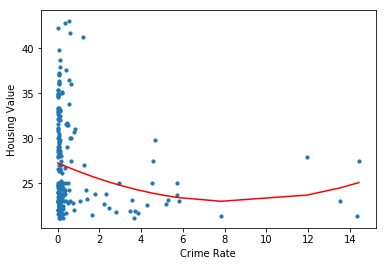

In [26]:

def apply_to_plt(Xs, y, label="misc", color='m'):
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(Xs,preds_s), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color=color, label=label)

apply_to_plt(Xs,preds_s, color="r", label="Square")
plt.scatter(Xs, Ys, s=10)
plt.ylabel('Housing Value')
plt.xlabel('Crime Rate')
plt.show()

# 3.4 Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **2.4** but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```